# Download and Crete nonIID data set

In [39]:
import torch
import numpy as np
import pandas as pd
from torch_geometric.datasets import Planetoid
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Citeseer dataset
dataset = Planetoid(root="data", name="Citeseer")
data = dataset[0]

# Convert node features to a NumPy array
features = data.x.numpy()

# Convert labels to a NumPy array
labels = data.y.numpy()

# Assign client IDs (example: round-robin assignment to 3 clients)
num_nodes = features.shape[0]
num_clients = 10  # You can change this based on your needs
client_ids = np.array([i % num_clients for i in range(num_nodes)])

# Create column names for features
feature_columns = [f"feature_{i}" for i in range(features.shape[1])]

# Create DataFrame
df = pd.DataFrame(features, columns=feature_columns)
df["label"] = labels
df["client_id"] = client_ids

In [40]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_3695,feature_3696,feature_3697,feature_3698,feature_3699,feature_3700,feature_3701,feature_3702,label,client_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2
3323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4
3325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5


In [41]:
def count_val(df):
    # count 
    C = {}
    for c in df['client_id'].unique():
        d = dict(df[df['client_id']==c]['label'].value_counts())
        d = dict(sorted(d.items()))
        
        C[c] = d
    df_count = pd.DataFrame.from_dict(C, orient='index')
    df_count.columns = [f'class_{i}' for i in df_count.columns]
    # df['client_id'] = df.index
    df_count = df_count.reset_index().rename(columns={'index': 'client_id'})  # Rename index as 'client_id'
    df_count = df_count[['client_id'] + [col for col in df_count.columns if col != 'client_id']]
    return df_count
df_data = count_val(df)
df_data

,client_id,class_0,class_1,class_2,class_3,class_4,class_5
0,0,23,48,77,82,64,39
1,1,31,72,65,64,55,46
2,2,24,63,60,56,72,58
3,3,26,54,71,72,48,62
4,4,30,53,66,75,53,56
5,5,21,58,63,70,76,45
6,6,26,58,72,69,58,50
7,7,26,64,77,59,55,51
8,8,25,72,57,72,52,54
9,9,32,48,60,82,63,47


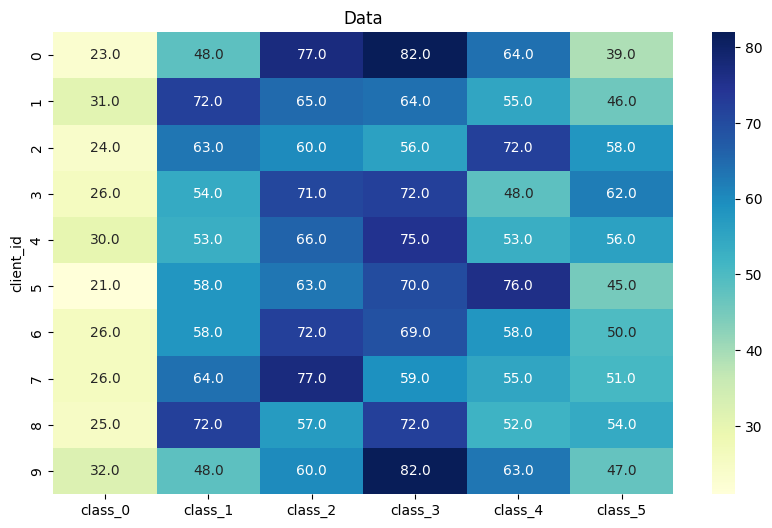

In [42]:
class_columns = [col for col in df_data.columns if col.startswith('class_')]
class_columns_sorted = sorted(class_columns, key=lambda x: int(x.split('_')[1]))
df_data = df_data[['client_id'] + class_columns_sorted]



df_data = df_data.sort_values(by='client_id')
df_data = df_data.sort_values(by='client_id')

# Optionally, set 'client_id' as the index
df_data.set_index('client_id', inplace=True)
# --- Visualization 2: Data Values Heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(df_data, annot=True, cmap="YlGnBu", fmt='.1f')
plt.title("Data")
plt.savefig("datas/data_values_heatmap.png", dpi=300)  # Save before showing
plt.show()
plt.close()

## Create NonIID Dataset

In [43]:
import numpy as np

def distribute_with_ratio(total, ratio):
    # Convert the ratio into proportional values
    scaled_values = np.array(ratio, dtype=np.float64)
    scaled_values = scaled_values / scaled_values.sum() * total
    
    # Apply stochastic rounding
    floored_values = np.floor(scaled_values).astype(int)
    remainder = total - floored_values.sum()
    
    # Distribute the remainder randomly
    for i in np.random.choice(len(ratio), remainder, replace=False):
        floored_values[i] += 1
    
    return floored_values.tolist()

def shift_left(lst, n=1):
    return lst[n:] + lst[:n]


    
# Initial ratio
initial_distribution = [3, 1, 1, 1, 1, 1, 0,0,0,0,0]
total_value = 701

# Generate a random distribution with the given ratio
random_result = distribute_with_ratio(total_value, initial_distribution)

print(random_result)

[263, 87, 87, 87, 88, 87, 0, 1, 1, 0, 0]


In [44]:
d = dict(df['label'].value_counts())
d

{3: 701, 2: 668, 4: 596, 1: 590, 5: 508, 0: 264}

In [45]:
S = {}
# initial_distribution = [3, 1, 1, 1, 1, 1, 0,0,0,0,0]
initial_distribution = [4, 3, 2, 2, 2, 0, 0,0,0,0]
for i,k in enumerate(d):
    
    total_value = d[k]
    random_result = distribute_with_ratio(total_value, initial_distribution)
    random_result = shift_left(random_result, n=2*i)
    # print(k,d[k],random_result)
    S[k] = random_result
S

{3: [215, 161, 107, 107, 108, 0, 1, 1, 1, 0],
 2: [102, 102, 103, 0, 0, 0, 0, 1, 205, 155],
 4: [91, 0, 1, 0, 0, 1, 183, 137, 92, 91],
 1: [1, 0, 0, 0, 181, 136, 91, 91, 90, 0],
 5: [0, 0, 156, 117, 79, 78, 78, 0, 0, 0],
 0: [81, 60, 40, 41, 40, 0, 0, 0, 1, 1]}

In [46]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_3695,feature_3696,feature_3697,feature_3698,feature_3699,feature_3700,feature_3701,feature_3702,label,client_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2
3323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3
3324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4
3325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,5


In [47]:
def randomRow(df,n,target_client,target_cls):
    # n = 10  # Change this to the number of rows you want
    random_rows = df[df['label']==target_cls].sample(n=n, random_state=42)  # Use random_state for reproducibility
    random_rows['client_id'] = target_client

    df = df.drop(random_rows.index).reset_index(drop=True)
    
    return df,random_rows

# a,b = randomRow(df,10,0,3)
# a

In [48]:
R = []
orginal_df = df.copy()
for c in S:
    # print(c,S[c])
    target_cls = c
    for i,v in enumerate(S[c]):
        target_client = i
        n = v
        # print(i,v)
        orginal_df,random_df = randomRow(orginal_df,n,target_client,target_cls)
        R.append(random_df)
df_noniid = pd.concat(R, ignore_index=True) 
df_noniid

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_3695,feature_3696,feature_3697,feature_3698,feature_3699,feature_3700,feature_3701,feature_3702,label,client_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
3323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
3324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
3325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8


In [49]:
df = count_val(df_noniid)
df

,client_id,class_0,class_1,class_2,class_3,class_4,class_5
0,0,81.0,1.0,102.0,215.0,91.0,NaN
1,1,60.0,NaN,102.0,161.0,NaN,NaN
2,2,40.0,NaN,103.0,107.0,1.0,156.0
3,3,41.0,NaN,NaN,107.0,NaN,117.0
4,4,40.0,181.0,NaN,108.0,NaN,79.0
5,8,1.0,90.0,205.0,1.0,92.0,NaN
6,9,1.0,NaN,155.0,NaN,91.0,NaN
7,6,NaN,91.0,NaN,1.0,183.0,78.0
8,7,NaN,91.0,1.0,1.0,137.0,NaN
9,5,NaN,136.0,NaN,NaN,1.0,78.0


In [50]:
df2 = df
df2.fillna(0, inplace=True)

# Convert all columns to integers
df2 = df2.astype(int)
df2

class_columns = [col for col in df2.columns if col.startswith('class_')]
class_columns_sorted = sorted(class_columns, key=lambda x: int(x.split('_')[1]))
df2 = df2[['client_id'] + class_columns_sorted]


In [54]:
df2
df2 = df2.reset_index()
df2
# df_fedsca_cora.to_csv("fedsca_cora_dataset.csv", index=False)
# print("✅ FedSCA Cora-based dataset saved as fedsca_cora_dataset.csv")

,client_id,class_0,class_1,class_2,class_3,class_4,class_5
0,0,81,1,102,215,91,0
1,1,60,0,102,161,0,0
2,2,40,0,103,107,1,156
3,3,41,0,0,107,0,117
4,4,40,181,0,108,0,79
5,5,0,136,0,0,1,78
6,6,0,91,0,1,183,78
7,7,0,91,1,1,137,0
8,8,1,90,205,1,92,0
9,9,1,0,155,0,91,0


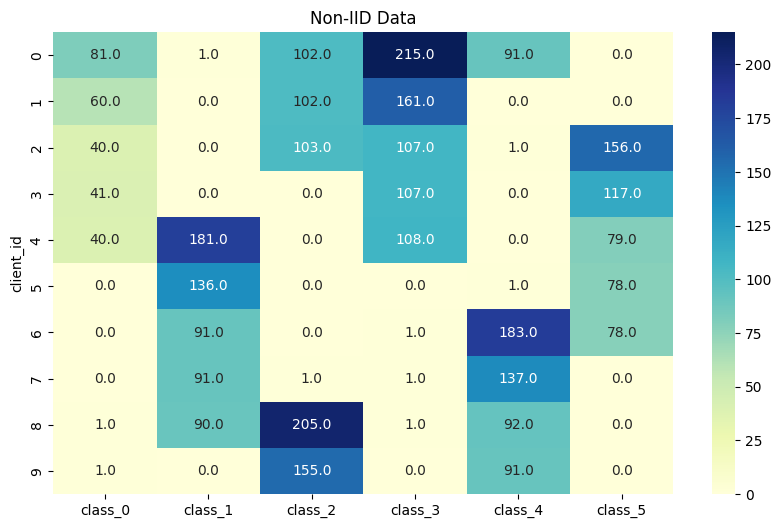

In [52]:


# class_columns = [col for col in df.columns if col.startswith('class_')]
# class_columns_sorted = sorted(class_columns, key=lambda x: int(x.split('_')[1]))
# df = df[['client_id'] + class_columns_sorted]



df2 = df2.sort_values(by='client_id')
df2 = df2.sort_values(by='client_id')

# Optionally, set 'client_id' as the index
df2.set_index('client_id', inplace=True)
# --- Visualization 2: Data Values Heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(df2, annot=True, cmap="YlGnBu", fmt='.1f')
plt.title("Non-IID Data")
plt.savefig("datas/noniid_data_values_heatmap.png", dpi=300)  # Save before showing
plt.show()
plt.close()

# Number Data of Each Round

In [56]:
data = {
    'Citeseer' : [52, 78, 104, 130, 156, 182, 208, 234, 260, 286, 312, 338, 364, 390, 416, 442, 468, 494, 520, 546, 572, 598, 624, 650, 676, 702, 728, 754, 780, 806, 832, 858, 884, 910, 936, 962, 988, 1014, 1040, 1066, 1092, 1118, 1144, 1170, 1196, 1222, 1248, 1274, 1300, 1326, 1352, 1378, 1404, 1430, 1456, 1482, 1508, 1534, 1560, 1586, 1612, 1638, 1664, 1690, 1716, 1742, 1768, 1794, 1820, 1846, 1872, 1898, 1924, 1950, 1976, 2002, 2028, 2054, 2080, 2106, 2132, 2158, 2184, 2210, 2236, 2262, 2288, 2314, 2340, 2366, 2392, 2418, 2444, 2470, 2496, 2522, 2548, 2574, 2600],
    'Cora' : [84, 105, 126, 147, 168, 189, 210, 231, 252, 273, 294, 315, 336, 357, 378, 399, 420, 441, 462, 483, 504, 525, 546, 567, 588, 609, 630, 651, 672, 693, 714, 735, 756, 777, 798, 819, 840, 861, 882, 903, 924, 945, 966, 987, 1008, 1029, 1050, 1071, 1092, 1113, 1134, 1155, 1176, 1197, 1218, 1239, 1260, 1281, 1302, 1323, 1344, 1365, 1386, 1407, 1428, 1449, 1470, 1491, 1512, 1533, 1554, 1575, 1596, 1617, 1638, 1659, 1680, 1701, 1722, 1743, 1764, 1785, 1806, 1827, 1848, 1869, 1890, 1911, 1932, 1953, 1974, 1995, 2016, 2037, 2058, 2079, 2100, 2121, 2142],
    'Pubmed' : [314, 471, 628, 785, 942, 1099, 1256, 1413, 1570, 1727, 1884, 2041, 2198, 2355, 2512, 2669, 2826, 2983, 3140, 3297, 3454, 3611, 3768, 3925, 4082, 4239, 4396, 4553, 4710, 4867, 5024, 5181, 5338, 5495, 5652, 5809, 5966, 6123, 6280, 6437, 6594, 6751, 6908, 7065, 7222, 7379, 7536, 7693, 7850, 8007, 8164, 8321, 8478, 8635, 8792, 8949, 9106, 9263, 9420, 9577, 9734, 9891, 10048, 10205, 10362, 10519, 10676, 10833, 10990, 11147, 11304, 11461, 11618, 11775, 11932, 12089, 12246, 12403, 12560, 12717, 12874, 13031, 13188, 13345, 13502, 13659, 13816, 13973, 14130, 14287, 14444, 14601, 14758, 14915, 15072, 15229, 15386, 15543, 15700]
    
}

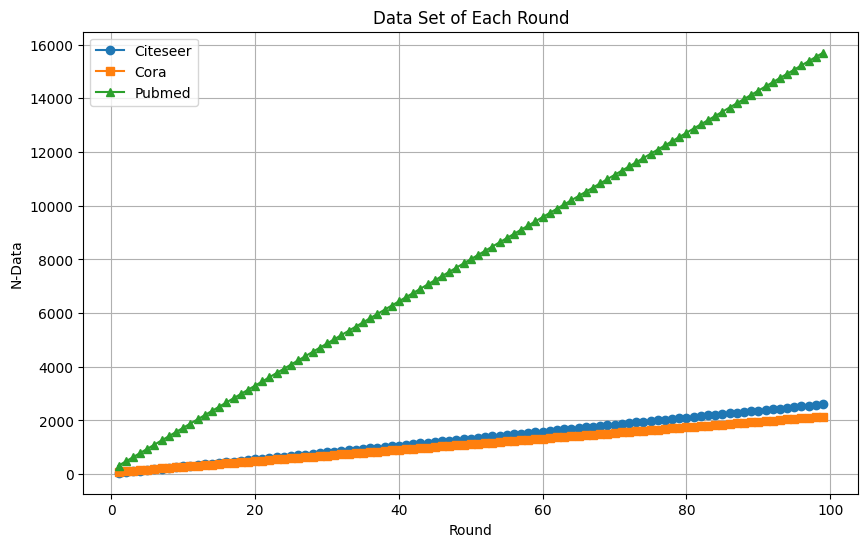

In [59]:
rounds = range(1, len(data['Citeseer']) + 1)

plt.figure(figsize=(10, 6))

# Plot each dataset with markers
plt.plot(rounds, data['Citeseer'], label='Citeseer', marker='o')
plt.plot(rounds, data['Cora'], label='Cora', marker='s')
plt.plot(rounds, data['Pubmed'], label='Pubmed', marker='^')

plt.xlabel("Round")
plt.ylabel("N-Data")
plt.title("Data Set of Each Round")
plt.legend()
plt.grid(True)

plt.savefig("datas/data_of_each_round.png", dpi=300)  # Save before showing

plt.show()

# Plot Result

In [37]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import ast

def plot_data(dataset_names,dataset_type,dataset_sd,n_client):
    # Create subplots: 1 row and 2 columns
    fig, axes = plt.subplots(1, len(dataset_names), figsize=(16, 6))
    
    # Loop over each dataset name and its corresponding subplot axis
    for ax, dataset_name in zip(axes, dataset_names):
        # Filter the DataFrame for the current dataset and dataset_type
        df_filter = df[(df['dataset'] == dataset_name) & (df['dataset_type'] == dataset_type)]
        df_filter = df_filter[['algorithm', 'trainng_accuracy']].sort_values(by='algorithm').reset_index(drop=True)
    
        # Plot training accuracy for each algorithm in the current dataset
        for index, row in df_filter.iterrows():
            # Convert the string representation of the list to an actual list and convert elements to float
            accuracy_list = ast.literal_eval(row['trainng_accuracy'])
            accuracy_list = [float(acc) for acc in accuracy_list]
            ax.plot(accuracy_list, marker='o', label=row['algorithm'])
        
        # Set labels, title, and legend for the subplot
        ax.set_xlabel('Round')
        ax.set_ylabel('Training Accuracy')
        title = f'{dataset_name}' if dataset_type == 'normal' else f'{dataset_name}-{dataset_type}'
        ax.set_title(title)
        ax.legend()
        ax.grid(True)
    
    # Adjust layout for better spacing between plots
    plt.tight_layout()
    plt.savefig(f"datas/plot_{dataset_type}_{dataset_sd}_{n_client}clients_{no}.png", dpi=300)  # Save before showing
    plt.show()

## plot normal

In [69]:
no = 1

In [70]:
df = pd.read_csv('datas/trainning_historys.csv')
df = df[df['idx'] >= 1740232281.5440938] 
dataset_sd = 'static'
dataset_names = list(df['dataset'].unique())
dataset_names.sort()
n_client = 10

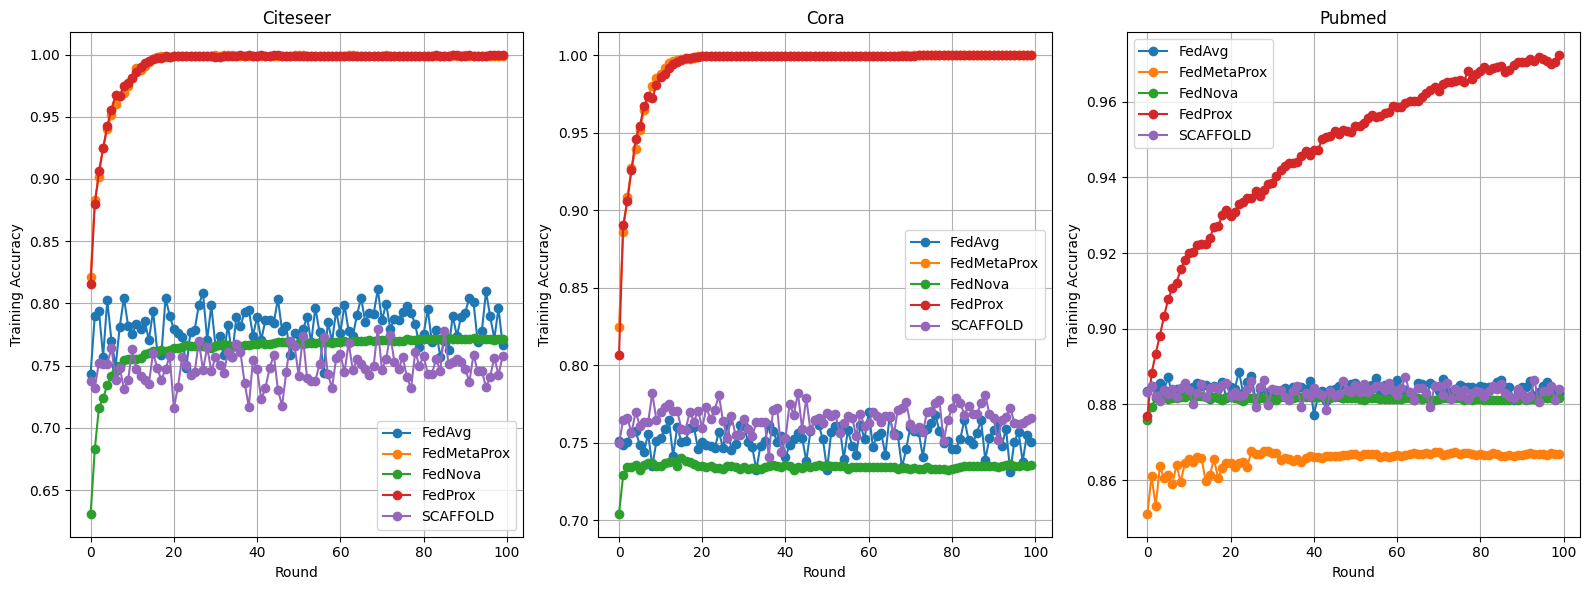

In [71]:
dataset_type = 'normal'
plot_data(dataset_names,dataset_type,dataset_sd,n_client)

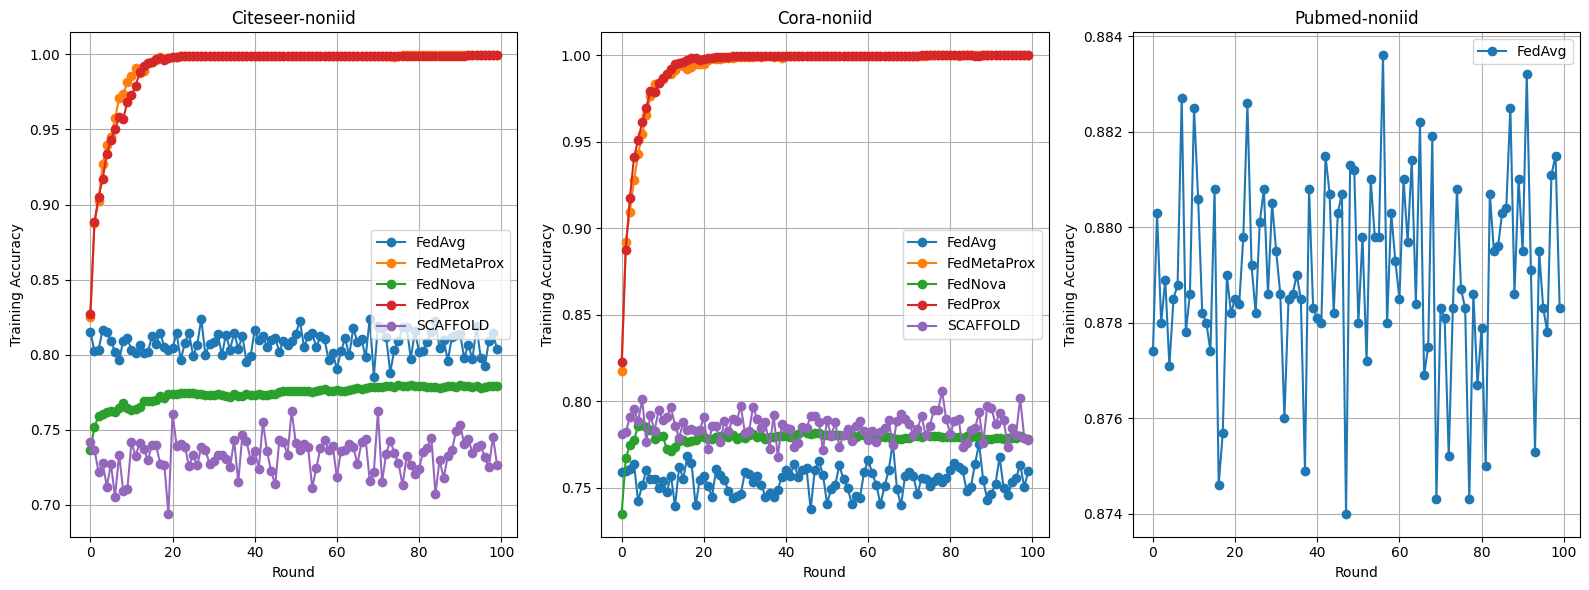

In [72]:
dataset_type = 'noniid'
plot_data(dataset_names,dataset_type,dataset_sd,n_client)

### Plot Dynamic

In [58]:
no = 2

In [59]:
df = pd.read_csv('datas/trainning_dynamic_historys.csv')
df = df[df['idx'] >= 1740298620.458038] 
dataset_sd = 'dynamic'
dataset_names = list(df['dataset'].unique())
dataset_names.sort()
n_client = 10

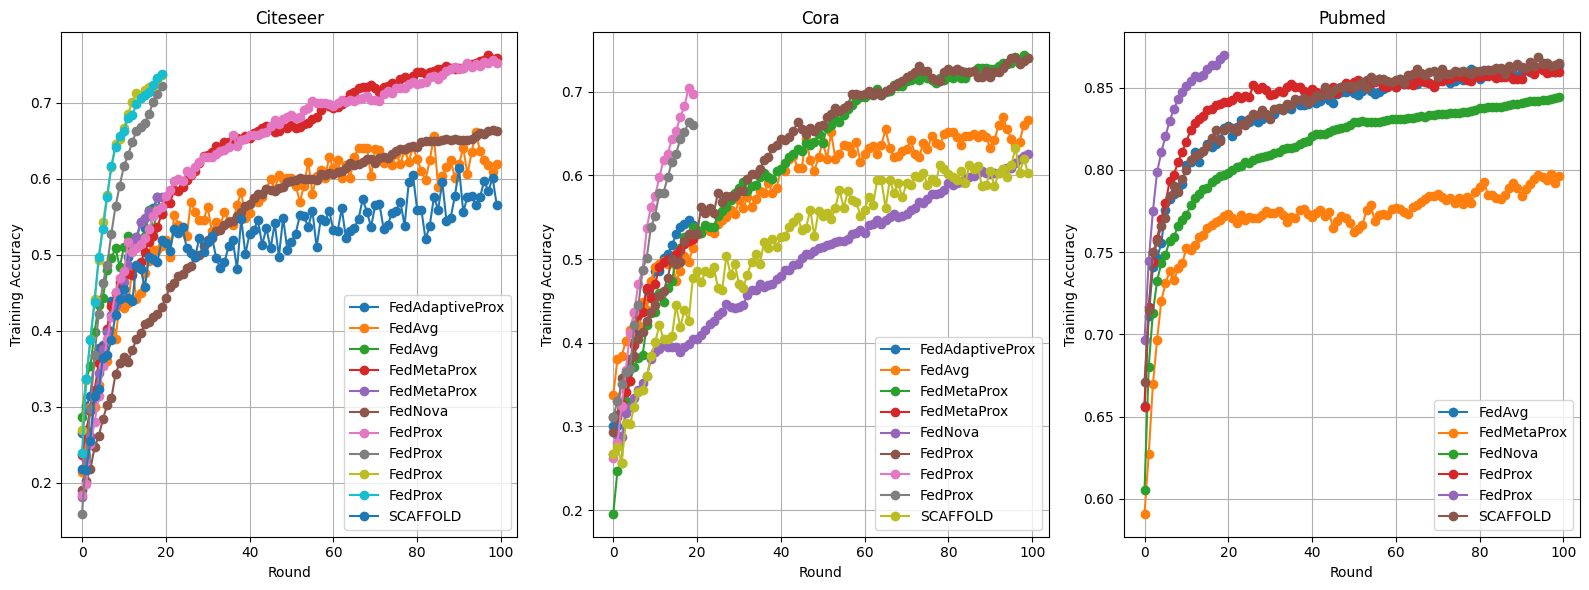

In [60]:
dataset_type = 'normal'
plot_data(dataset_names,dataset_type,dataset_sd,n_client)

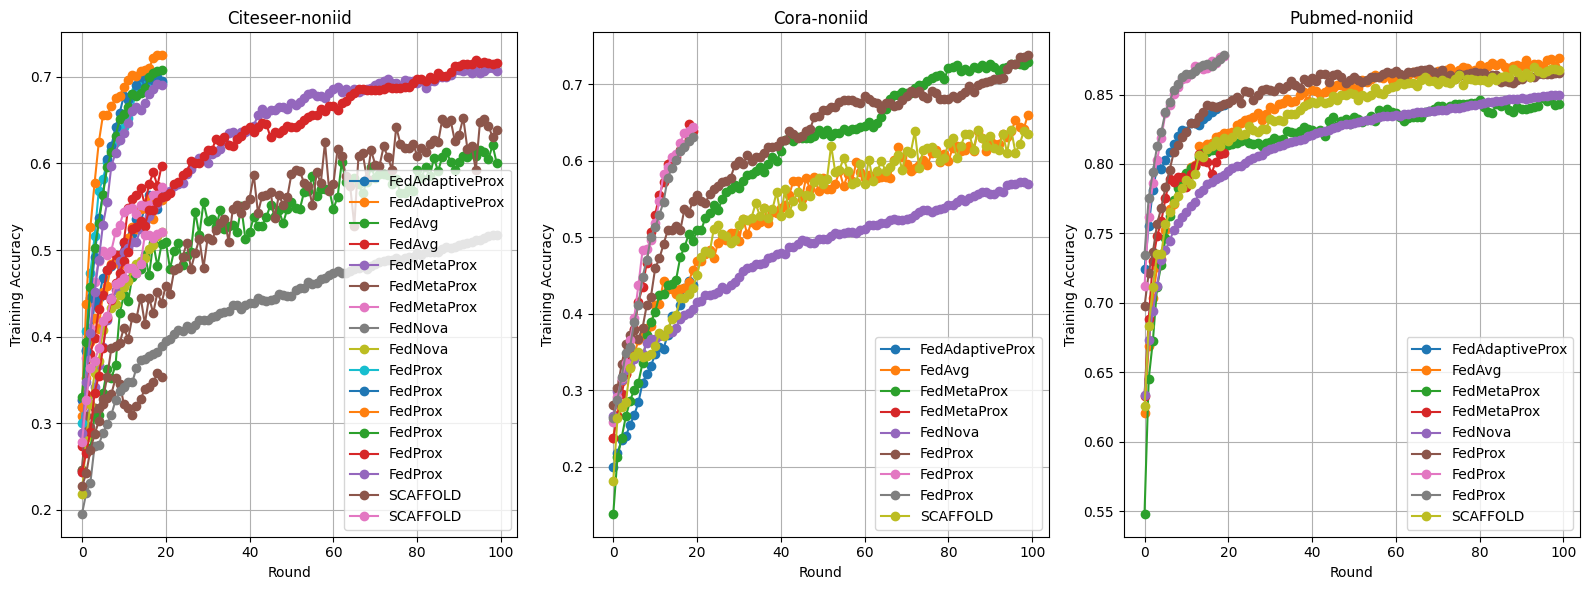

In [61]:
dataset_type = 'noniid'
plot_data(dataset_names,dataset_type,dataset_sd,n_client)

In [62]:
initial_distribution = [4,4,4,3,2] + [1]*25
len(initial_distribution)

30